In [62]:
import pandas as pd
filename = r'C:\\sqlite\\mysql\\code\\08_1\\file2\\owid-covid-data.csv'
df = pd.read_csv(filename, encoding='cp949')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192301 entries, 0 to 192300
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    192301 non-null  object 
 1   continent                                   181123 non-null  object 
 2   location                                    192301 non-null  object 
 3   date                                        192301 non-null  object 
 4   total_cases                                 184750 non-null  float64
 5   new_cases                                   184508 non-null  float64
 6   new_cases_smoothed                          183334 non-null  float64
 7   total_deaths                                166260 non-null  float64
 8   new_deaths                                  166241 non-null  float64
 9   new_deaths_smoothed                         165078 non-null  float64
 

In [64]:
cov = df[['iso_code', 'location', 'date', 'total_cases', 'population']]

In [65]:
cov.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-02-24,5.0,39835428.0
1,AFG,Afghanistan,2020-02-25,5.0,39835428.0
2,AFG,Afghanistan,2020-02-26,5.0,39835428.0
3,AFG,Afghanistan,2020-02-27,5.0,39835428.0
4,AFG,Afghanistan,2020-02-28,5.0,39835428.0


In [66]:
kor = cov[cov['location'].str.contains('South Korea')]
kor.nunique

<bound method DataFrame.nunique of        iso_code     location        date  total_cases  population
160818      KOR  South Korea  2020-01-22          1.0  51305184.0
160819      KOR  South Korea  2020-01-23          1.0  51305184.0
160820      KOR  South Korea  2020-01-24          2.0  51305184.0
160821      KOR  South Korea  2020-01-25          2.0  51305184.0
160822      KOR  South Korea  2020-01-26          3.0  51305184.0
...         ...          ...         ...          ...         ...
161681      KOR  South Korea  2022-06-03   18153851.0  51305184.0
161682      KOR  South Korea  2022-06-04   18163686.0  51305184.0
161683      KOR  South Korea  2022-06-05   18168708.0  51305184.0
161684      KOR  South Korea  2022-06-06   18174880.0  51305184.0
161685      KOR  South Korea  2022-06-07   18188200.0  51305184.0

[868 rows x 5 columns]>

In [67]:
cov[cov.duplicated()]
usa = cov[(cov['iso_code']=='USA')|(cov['iso_code']=='KOR')]
usa

,iso_code,location,date,total_cases,population
160818,KOR,South Korea,2020-01-22,1.0,51305184.0
160819,KOR,South Korea,2020-01-23,1.0,51305184.0
160820,KOR,South Korea,2020-01-24,2.0,51305184.0
160821,KOR,South Korea,2020-01-25,2.0,51305184.0
160822,KOR,South Korea,2020-01-26,3.0,51305184.0
...,...,...,...,...,...
182036,USA,United States,2022-06-03,84724329.0,332915074.0
182037,USA,United States,2022-06-04,84748884.0,332915074.0
182038,USA,United States,2022-06-05,84762022.0,332915074.0
182039,USA,United States,2022-06-06,84882287.0,332915074.0


In [68]:
kor_df = usa[usa['iso_code']=='KOR']
kor_df

,iso_code,location,date,total_cases,population
160818,KOR,South Korea,2020-01-22,1.0,51305184.0
160819,KOR,South Korea,2020-01-23,1.0,51305184.0
160820,KOR,South Korea,2020-01-24,2.0,51305184.0
160821,KOR,South Korea,2020-01-25,2.0,51305184.0
160822,KOR,South Korea,2020-01-26,3.0,51305184.0
...,...,...,...,...,...
161681,KOR,South Korea,2022-06-03,18153851.0,51305184.0
161682,KOR,South Korea,2022-06-04,18163686.0,51305184.0
161683,KOR,South Korea,2022-06-05,18168708.0,51305184.0
161684,KOR,South Korea,2022-06-06,18174880.0,51305184.0


In [73]:
kor_df = kor.set_index('date')
kor_df

,iso_code,location,total_cases,population
date,,,,
2020-01-22,KOR,South Korea,1.0,51305184.0
2020-01-23,KOR,South Korea,1.0,51305184.0
2020-01-24,KOR,South Korea,2.0,51305184.0
2020-01-25,KOR,South Korea,2.0,51305184.0
2020-01-26,KOR,South Korea,3.0,51305184.0
...,...,...,...,...
2022-06-03,KOR,South Korea,18153851.0,51305184.0
2022-06-04,KOR,South Korea,18163686.0,51305184.0
2022-06-05,KOR,South Korea,18168708.0,51305184.0


In [75]:
usa_df = usa[usa['iso_code']=='USA']
usa_df

,iso_code,location,date,total_cases,population
181173,USA,United States,2020-01-22,1.0,332915074.0
181174,USA,United States,2020-01-23,1.0,332915074.0
181175,USA,United States,2020-01-24,2.0,332915074.0
181176,USA,United States,2020-01-25,2.0,332915074.0
181177,USA,United States,2020-01-26,5.0,332915074.0
...,...,...,...,...,...
182036,USA,United States,2022-06-03,84724329.0,332915074.0
182037,USA,United States,2022-06-04,84748884.0,332915074.0
182038,USA,United States,2022-06-05,84762022.0,332915074.0
182039,USA,United States,2022-06-06,84882287.0,332915074.0


In [76]:
usa_df = usa_df.set_index('date')
usa_df

,iso_code,location,total_cases,population
date,,,,
2020-01-22,USA,United States,1.0,332915074.0
2020-01-23,USA,United States,1.0,332915074.0
2020-01-24,USA,United States,2.0,332915074.0
2020-01-25,USA,United States,2.0,332915074.0
2020-01-26,USA,United States,5.0,332915074.0
...,...,...,...,...
2022-06-03,USA,United States,84724329.0,332915074.0
2022-06-04,USA,United States,84748884.0,332915074.0
2022-06-05,USA,United States,84762022.0,332915074.0


In [85]:
usa_df['total_cases']

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           5.0
                 ...    
2022-06-03    84724329.0
2022-06-04    84748884.0
2022-06-05    84762022.0
2022-06-06    84882287.0
2022-06-07    85003945.0
Name: total_cases, Length: 868, dtype: float64

In [86]:
kor_df['total_cases']

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-06-03    18153851.0
2022-06-04    18163686.0
2022-06-05    18168708.0
2022-06-06    18174880.0
2022-06-07    18188200.0
Name: total_cases, Length: 868, dtype: float64

In [94]:
df_cv = round(usa_df['population']['2020-01-22'] / kor_df['population']['2020-01-22'],2)
df_cv

6.49

<Axes: xlabel='date'>

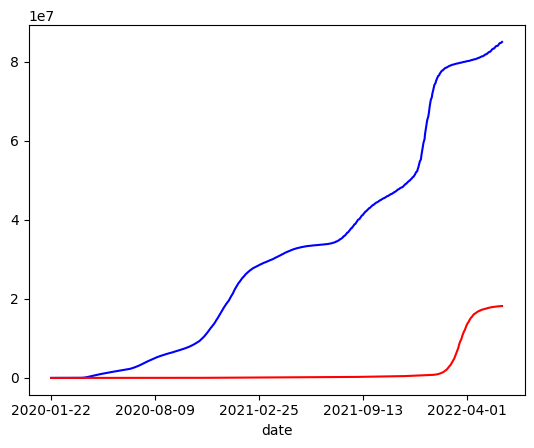

In [110]:
import matplotlib.pyplot as plt
kor_pop = kor_df['total_cases']
usa_pop = usa_df['total_cases']

usa_pop.plot(kind='line',color='b')
kor_pop.plot(kind='line',color='r')


In [ ]:
final_revised_df = pd.DataFrame({
    'KOR': kor_total_cases * rate,            # 비율 반영
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index
)

일부 데이터 확인하기
final_revised_df.head()

In [ ]:
final_revised_df['2022-01-01':].plot.line(rot=45)